[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework01.ipynb)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Import and preparing data

In [ ]:
df = pd.read_csv("PCA_three_clusters_data.csv")

X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
target_names = np.unique(y)
target_names = np.char.mod("%d", target_names)

Standarization data and applying PCA

In [ ]:
scaler = StandardScaler()
X_sd = scaler.fit_transform(X)

pca = PCA(n_components = 3)
XV = pca.fit_transform(X_sd)

Visualising the data in a 2D plot using 2 principal components

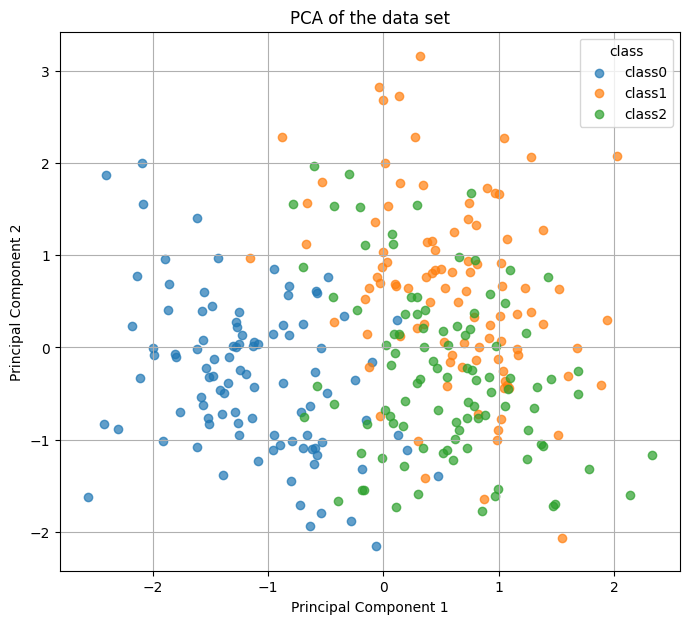

In [29]:
plt.figure(figsize=(8, 7))
for i, target_name in enumerate(target_names):
    plt.scatter(XV[y==i, 0], XV[y==i, 1], label="class"+target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of the data set")
plt.legend(title="class")
plt.grid(True)
plt.show()

# 2D scatter plots for the original feature pairs:

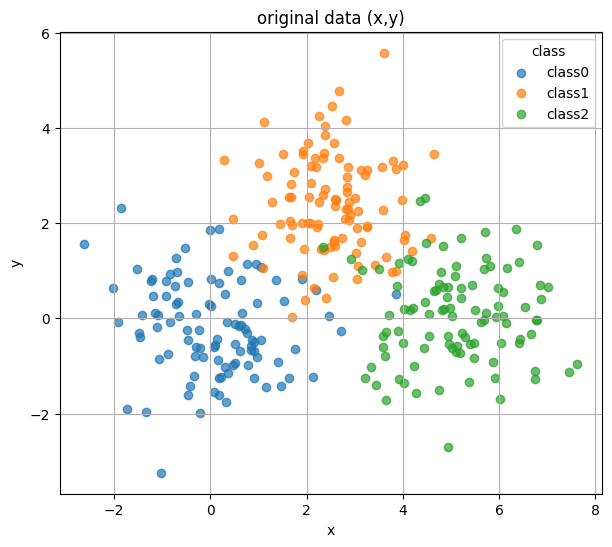

In [26]:
plt.figure(figsize=(7, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], label="class"+target_name, alpha=0.7)

plt.xlabel("x")
plt.ylabel("y")
plt.title("original data (x,y)")
plt.legend(title="class")
plt.grid(True)
plt.show()

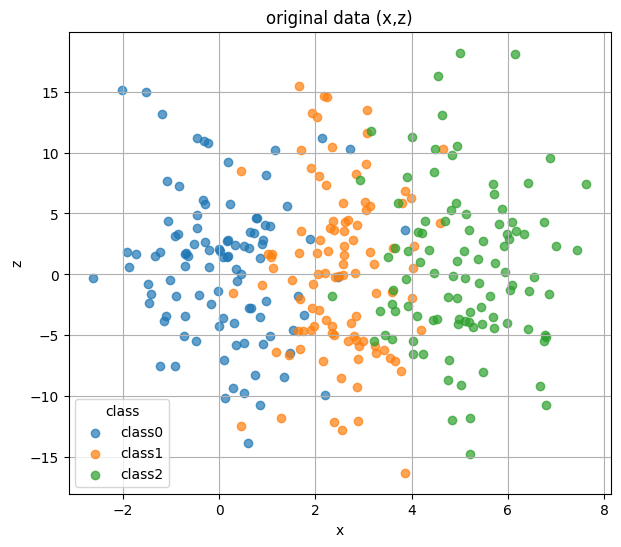

In [27]:
plt.figure(figsize=(7, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y==i, 0], X[y==i, 2], label="class"+target_name, alpha=0.7)

plt.xlabel("x")
plt.ylabel("z")
plt.title("original data (x,z)")
plt.legend(title="class")
plt.grid(True)
plt.show()

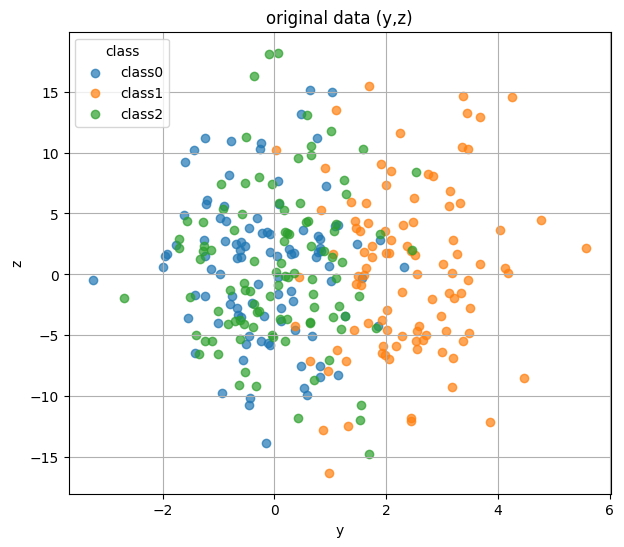

In [28]:
plt.figure(figsize=(7, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y==i, 1], X[y==i, 2], label="class"+target_name, alpha=0.7)

plt.xlabel("y")
plt.ylabel("z")
plt.title("original data (y,z)")
plt.legend(title="class")
plt.grid(True)
plt.show()

# Question 1:
Does PCA improve the separation of data points from different clusters compared to the original feature spaces?

# Response:
PCA **does not improve** the separation of data points from different clusters compared to the original feature space, as we can see by comparing the plots above. Despite the fact that the points in the original data are separated into clusters on the 2D (x, y) plot, the data after applying PCA does not show this separation.


Let's look at the 3D scatter plot for the original data

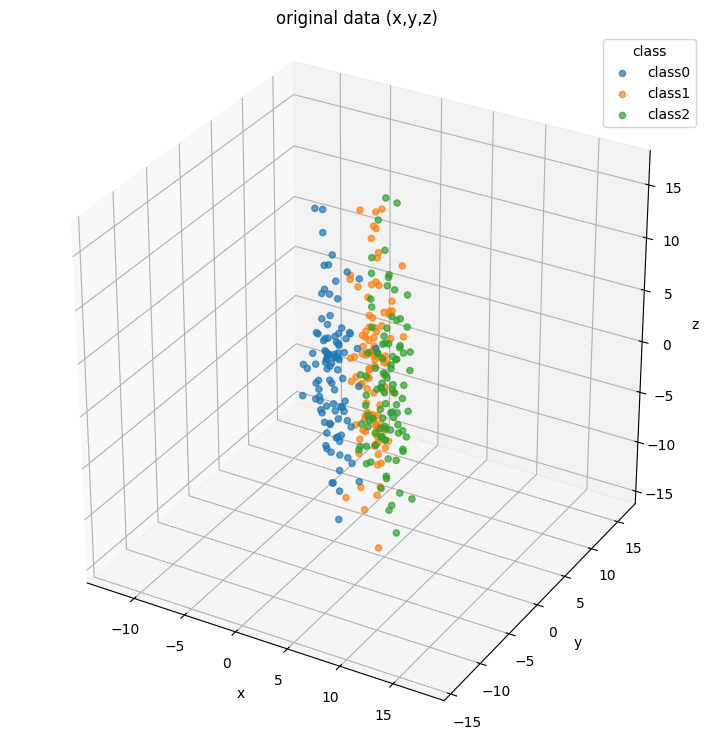

In [24]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')

for i, target_name in enumerate(target_names):
    ax.scatter(X[y==i,0], X[y==i,1], X[y==i,2], label="class"+target_name, alpha=0.7)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
z_min, z_max = X[:, 2].min(), X[:, 2].max()

range_max = max(x_max - x_min, y_max - y_min, z_max - z_min)
x_center, y_center, z_center = (x_max + x_min) / 2, (y_max + y_min) / 2, (z_max + z_min) / 2

ax.set_xlim(x_center - range_max/2, x_center + range_max/2)
ax.set_ylim(y_center - range_max/2, y_center + range_max/2)
ax.set_zlim(z_center - range_max/2, z_center + range_max/2)

ax.set_box_aspect([1, 1, 1])

plt.title("original data (x,y,z)")
plt.legend(title="class")
plt.show()

The same for standardized data

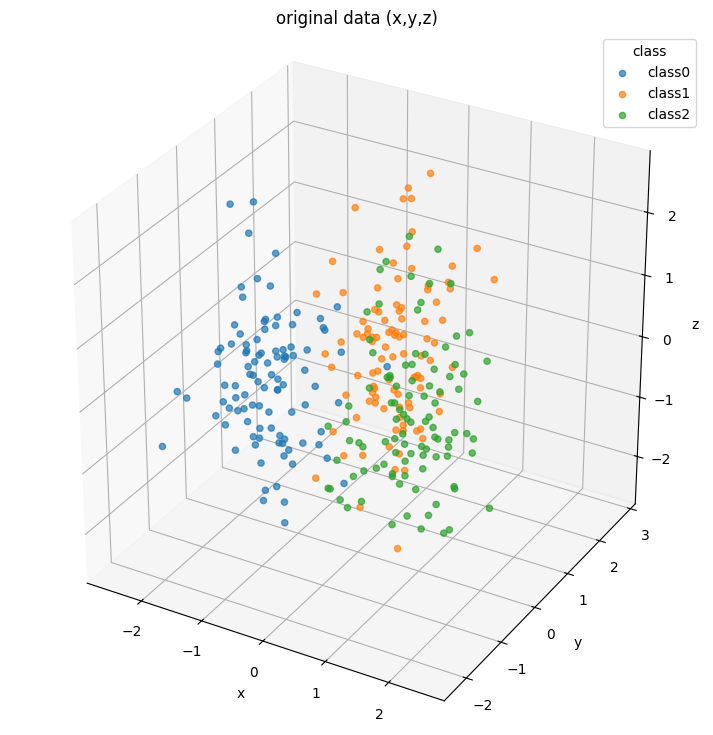

In [23]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')

for i, target_name in enumerate(target_names):
    ax.scatter(X_sd[y==i,0], X_sd[y==i,1], X_sd[y==i,2], label="class"+target_name, alpha=0.7)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

x_min, x_max = X_sd[:, 0].min(), X_sd[:, 0].max()
y_min, y_max = X_sd[:, 1].min(), X_sd[:, 1].max()
z_min, z_max = X_sd[:, 2].min(), X_sd[:, 2].max()

range_max = max(x_max - x_min, y_max - y_min, z_max - z_min)
x_center, y_center, z_center = (x_max + x_min) / 2, (y_max + y_min) / 2, (z_max + z_min) / 2

ax.set_xlim(x_center - range_max/2, x_center + range_max/2)
ax.set_ylim(y_center - range_max/2, y_center + range_max/2)
ax.set_zlim(z_center - range_max/2, z_center + range_max/2)

ax.set_box_aspect([1, 1, 1])

plt.title("original data (x,y,z)")
plt.legend(title="class")
plt.show()

Analyzing the above plots, we can see that the highest variance in the data (i.e., the direction of the principal component in PCA) does not necessarily correspond to the direction of class separation. The classes appear to be most separated along the x-axis and least separated along the z-axis in the original space. However, PCA maximizes overall data variance rather than class separation, and this variance is strongly influenced by the variability along the z-axis in the original space. As a result of this transformation, the classes may appear closer together in the new space if their separation does not align with the directions of the highest variance

# Question 2
Why is standardization necessary before applying PCA?

# Response:
Standardization is necessary before applying PCA because this technique relies on analyzing the variance of individual features. When dealing with data that have different units or scales, features with larger scales may dominate the analysis. For example, if one feature (e.g., income) has values several orders of magnitude larger than another feature (e.g., age), and standardization is not applied, PCA may assign excessive importance to the feature with higher variance, even if its variability is not significant in the context of the analysis. As a result, this can lead to incorrect selection of principal components, as the algorithm might consider the high-variance feature more important, even though it does not play a crucial role in the analysis. Standardization transforms the data so that all features have the same unit and range, allowing for a fair comparison of their variance.